# 0. Imports

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1 Load Data

In [2]:
df_raw = pd.read_csv('data/df_ready.csv')

In [3]:
df_raw = df_raw.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [4]:
df_raw.head()

,Date_imp_d,Category_name,name,price,disc_price,merchant,Disc_percentage,isSale,Imp_count,brand,p_description,dateAdded,dateSeen,dateUpdated,manufacturer,Day_n,month,month_n,day,Week_Number
0,2017/12/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50
1,2017/09/08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Friday,9,September,8,36
2,2017/10/24,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,10,October,24,43
3,2017/08/15,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,8,August,15,33
4,2017/09/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,9,September,14,37


# 1. Descrição dos Dados

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [6]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']
df1.columns = cols_name

## 1.2 Data Dimension

In [7]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of cols: {df1.shape[1]}')

Number of rows: 23151
Number of cols: 20


## 1.3 Data Types

In [8]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
dateadded           object
dateseen            object
dateupdated         object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Check NA

In [9]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

Explicação das colunas principais: 
* date_imp: data que foi feita a compra 
* category_name: diferentes categorias do produto 
* name: nome do produto 
* price: preço
* disc: desconto que foi dado
* merchant: loja 
* brand: quem construiu

## 1.5 cHANGE tYPES

In [10]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'])

## 1.7 Descriptive Statistics

In [11]:
num_attributes = df1.select_dtypes( include=['float64', 'int64'])
cat_attributes = df1.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [12]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

,att,min,max,range,mean,median,std,skew,kurt
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


Essa análise a priori é inconclusiva porque estamos analisando produtos diferente, exemplo o mínimo pode ser uma bala e o valor máximo pode ser um macbook. Com isso, não tem como comparamos produtos diferentes de lojas diferentes!

# 2.0 Exploratory Data Analysis

In [13]:
df2 = df1.copy()

In [14]:
df2.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'dateadded', 'dateseen', 'dateupdated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 2.1 Hipóteses

- Qual o merchant que mais vende? 
- Qual a categoria mais vendida? 
- Qual a marca mais vendida? 
- Qual os meses que mais vende? 
- Quais dias da semana mais vende?

#### 1. Qual o merchant que mais vende? 

In [19]:
ax1 = df2[["date_imp", "merchant"]].groupby("merchant").count().reset_index().sort_values(by="date_imp",ascending=False)
ax1

,merchant,date_imp
1,Bestbuy.com,11287
4,bhphotovideo.com,5064
2,Walmart.com,3947
5,ebay.com,2809
0,Amazon.com,25
6,kmart.com,17
3,barcodable.com,2


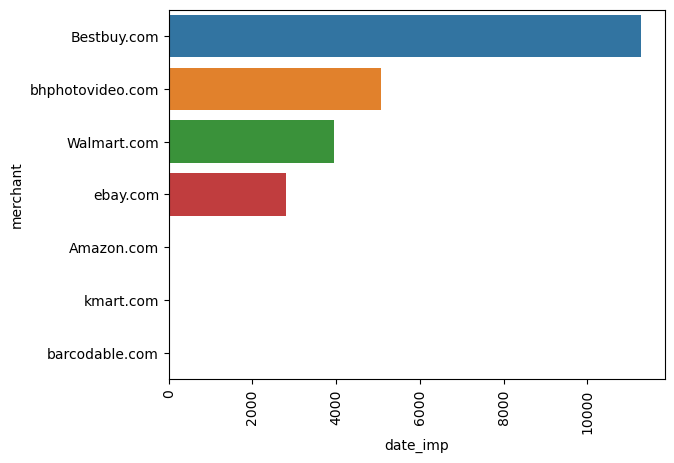

In [40]:
sns.barplot(y="merchant", x="date_imp", data=ax1, orient="h")
plt.xticks(rotation=90)  
plt.show()

A bestbuy foi a loja onde mais ocorreu vendas

In [43]:
# análise individual das lojas 
df_best     = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp      = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart  = df2[df2['merchant'] == 'Walmart.com']
df_ebay     = df2[df2['merchant'] == 'ebay.com']

### 2. Qual categoria mais vendida?

#### 2.1. Categorias mais vendidas no geral? 

In [49]:
aux2 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
aux2

,category_name,date_imp
57,"tv, television, video",2130
27,"laptop, computer",1715
50,"speaker, portable, bluetooth",1104
5,"camera, mirrorless, photo",1072
9,"car, speaker, subwoofer",865
41,"receiver, amplifier, home",817
6,"camera, shoot",744
15,"drive, storage, hard",719
16,"drive, storage, internal",718
8,"car, receiver, dash",712


tv, television, video é a categoria mais vendida

#### 2. 5 Categorias mais vendidas por loja

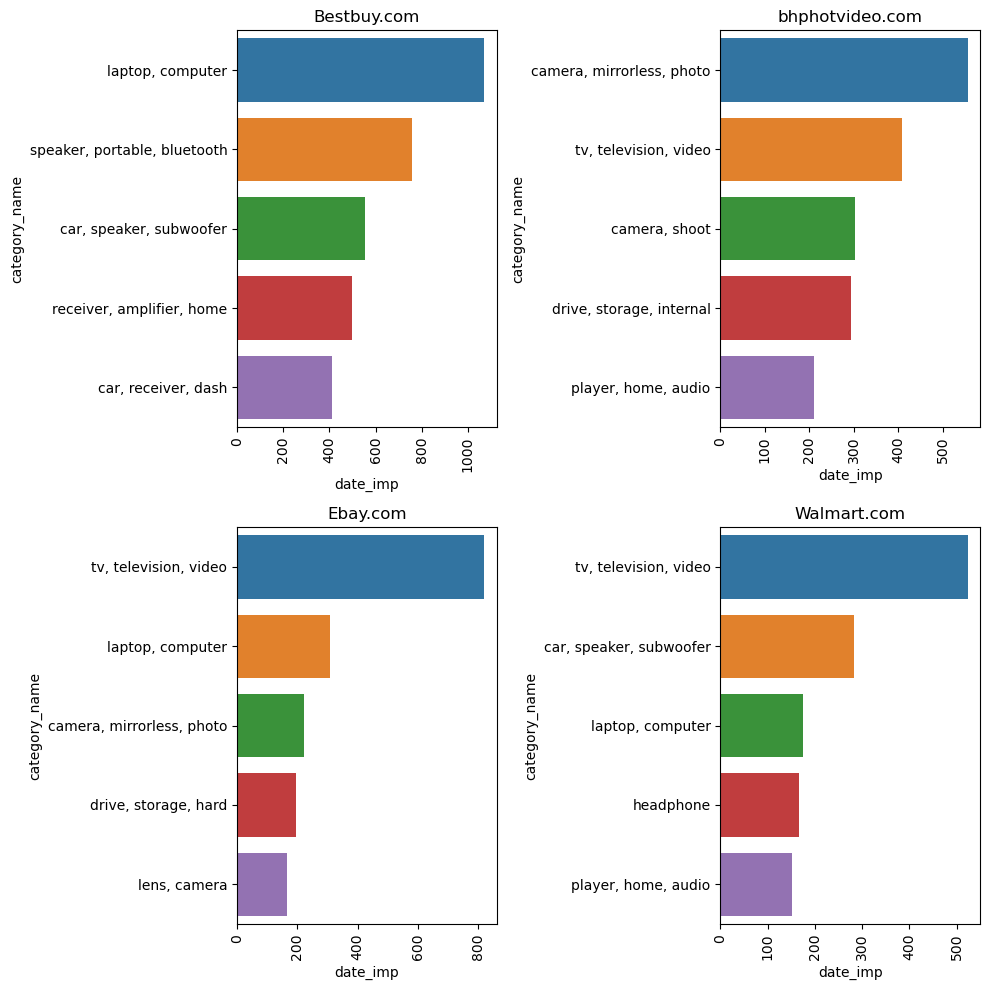

In [59]:
plt.figure(figsize=(10,10))

# Para Bestbuy.com
plt.subplot(2,2,1)
aux3 = df_best[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
top10_bestbuy = aux3.head(5)  # Pegar os top 10
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(y='category_name', x='date_imp', data=top10_bestbuy)

# Para bhphotvideo.com
plt.subplot(2,2,2)
aux4 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
top10_bhp = aux4.head(5)  # Pegar os top 10
plt.xticks(rotation=90)
plt.title('bhphotvideo.com')
sns.barplot(y='category_name',x='date_imp', data=top10_bhp)

# Para Ebay.com
plt.subplot(2,2,3)
aux5 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
top10_ebay = aux5.head(5)  # Pegar os top 10
plt.xticks(rotation=90)
plt.title('Ebay.com')
sns.barplot(y='category_name', x='date_imp', data=top10_ebay)

# Para Walmart.com
plt.subplot(2,2,4)
aux6 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
top10_walmart = aux6.head(5)  # Pegar os top 10
plt.xticks(rotation=90)
plt.title('Walmart.com')
sns.barplot(y='category_name', x='date_imp', data=top10_walmart)

plt.tight_layout()
plt.show()

Tv, television e video são as categorias mais vendidas no Walmart e Ebay. No restante as categorias são variadas!

### 3. Qual a marca mais vendida 

#### 3.1 Qual a marca mais vendida no geral

In [65]:
plt.figure(figsize=(20,10))
aux7 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
aux7.head(10)

,brand,date_imp
213,Sony,3205
189,Samsung,1924
12,Apple,1771
254,Yamaha,721
166,Pioneer,559
37,Canon,528
109,Kenwood,458
146,Nikon,449
97,JBL,385
190,SanDisk,361


<Figure size 2000x1000 with 0 Axes>

#### 3.2 Qual a marca mais vendida por loja

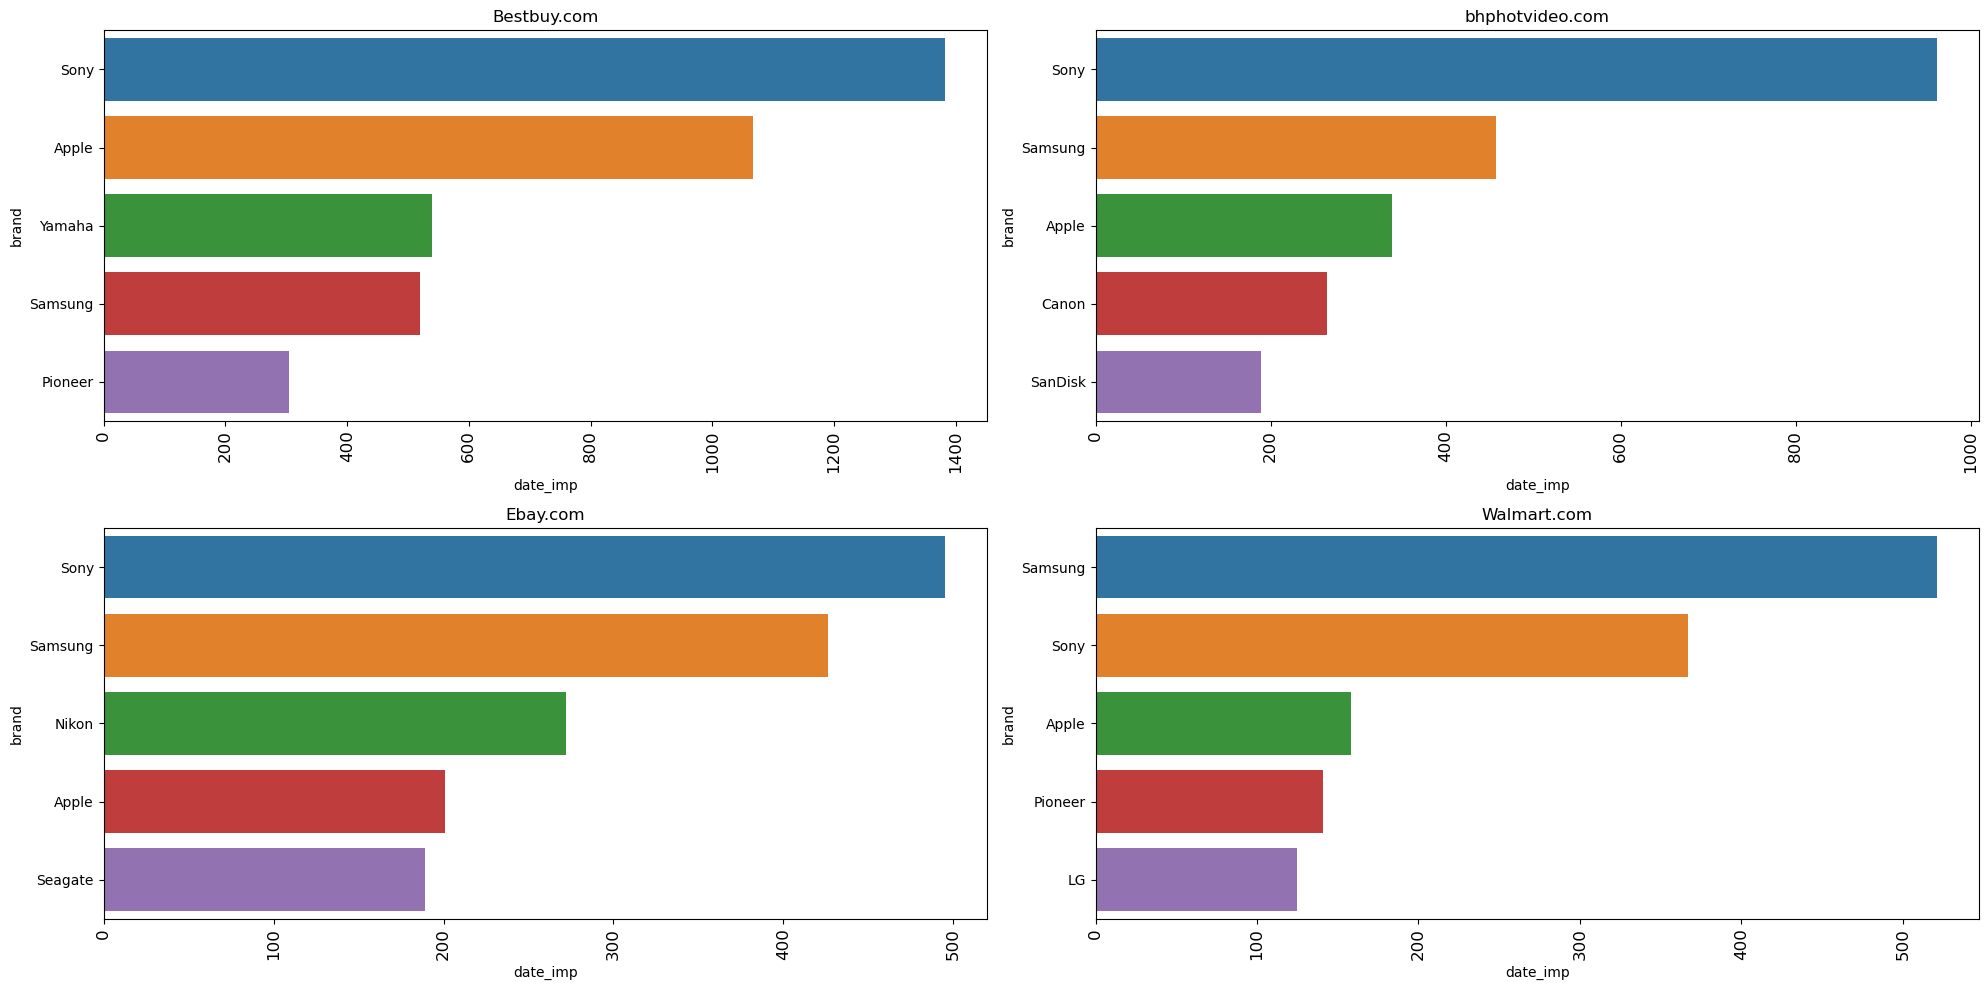

In [70]:
plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
aux8 = df_best[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(y='brand',x='date_imp', data=aux8.head())

plt.subplot(2,2,2)
aux9 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(y='brand', x='date_imp', data=aux9.head())

plt.subplot(2,2,3)
aux10 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(y='brand',x='date_imp', data=aux10.head())

plt.subplot(2,2,4)
aux11 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(y='brand',x='date_imp', data=aux11.head())

plt.tight_layout()

Somente no Walmart que a marca mais vendida é Samsung. Em todos os outros a categoria mais vendida é Sony

### 2.4 Quais os dias que mais vendem?

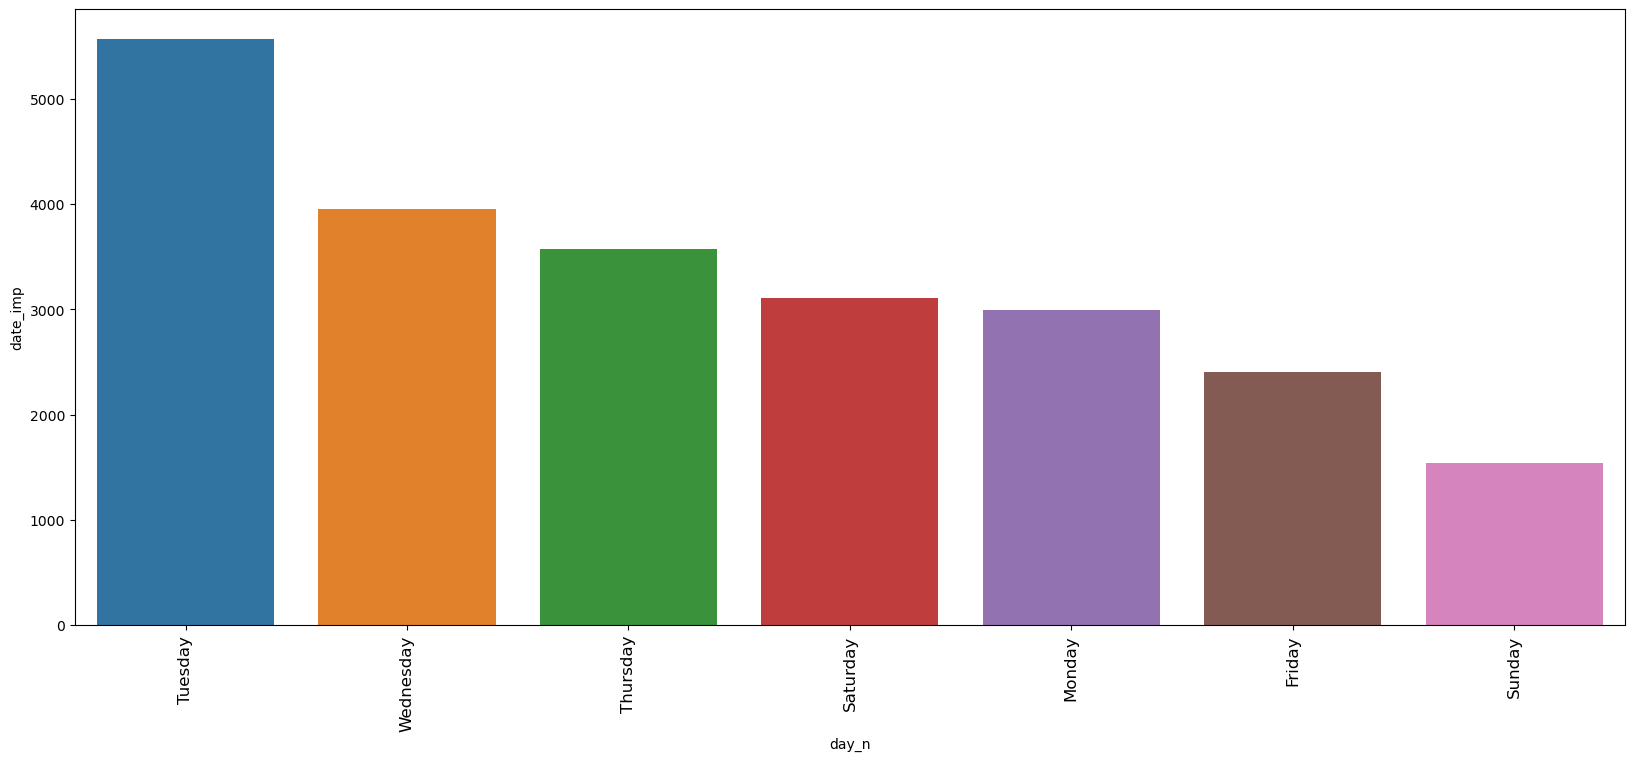

In [72]:
plt.figure(figsize=(20,8))
aux12 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='day_n', y='date_imp', data=aux12);

Terça-feira é o dia que mais vende

### 2.4.1 Quais os dias que mais vendem por loja

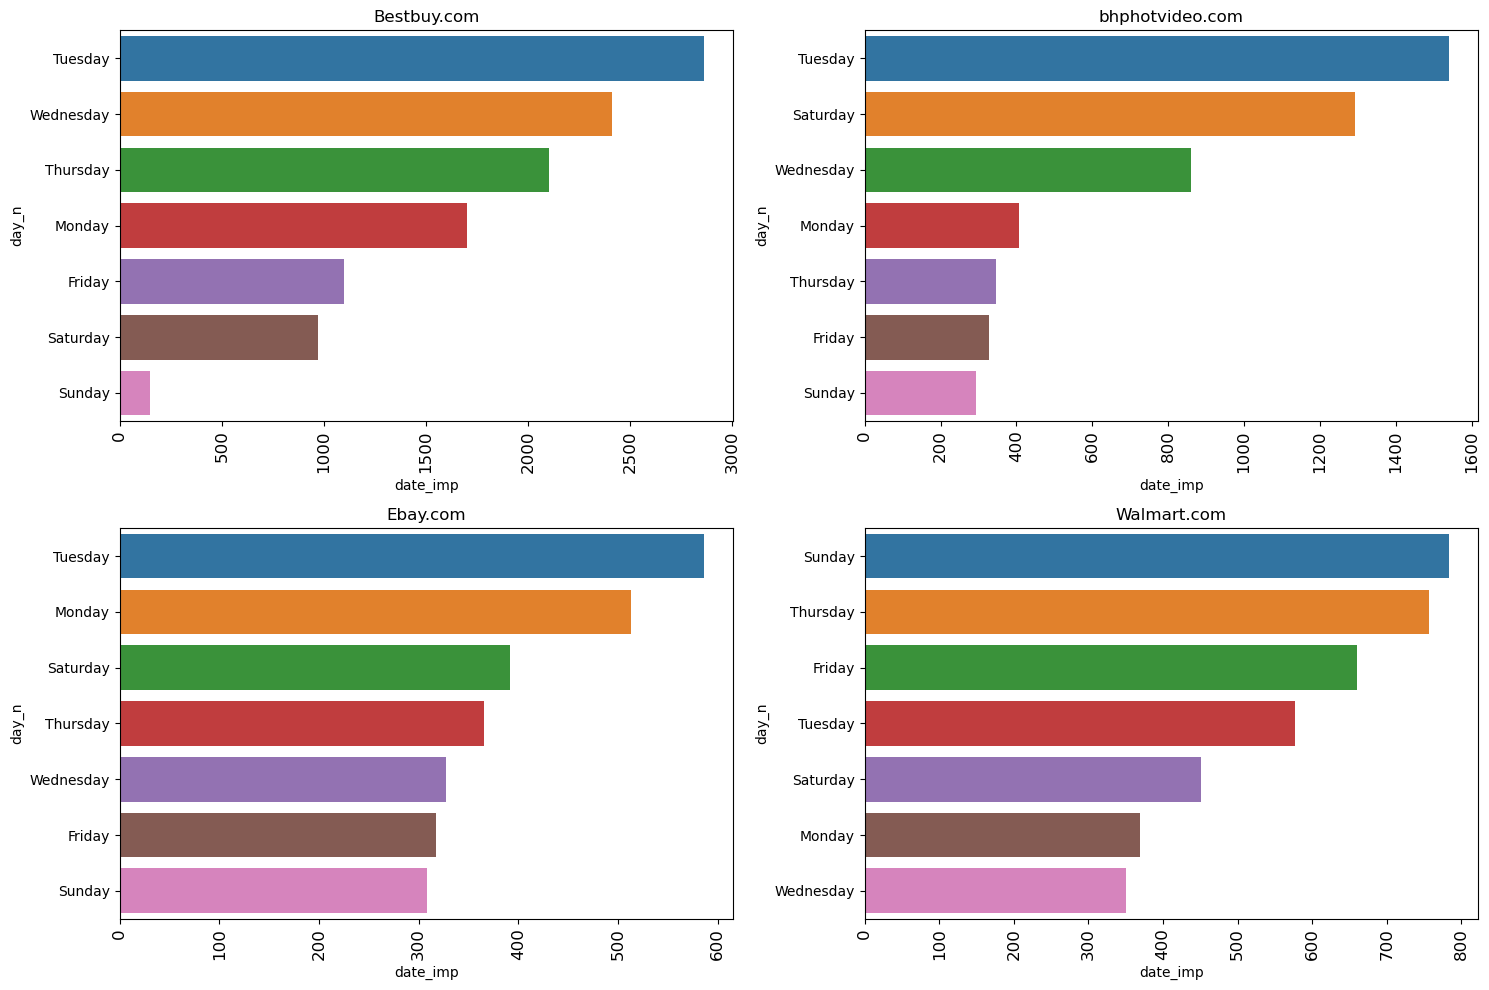

In [75]:
plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
aux13 = df_best[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(y='day_n', x='date_imp', data=aux13)

plt.subplot(2,2,2)
aux14 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(y='day_n', x='date_imp', data=aux14)

plt.subplot(2,2,3)
aux15 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(y='day_n', x='date_imp', data=aux15)

plt.subplot(2,2,4)
aux16 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(y='day_n', x='date_imp', data=aux16)

plt.tight_layout()

Somente no Walmart que as vendas acontecem mais no domingo. Futuramente podemos investigar se tem fundamento ser o target (público-alvo) que compra Samsung ter os domingos para fazer essas compras. O restante as compras acontecem mais na terça-feira! 

#### 2.5 Quais os meses que mais vendem

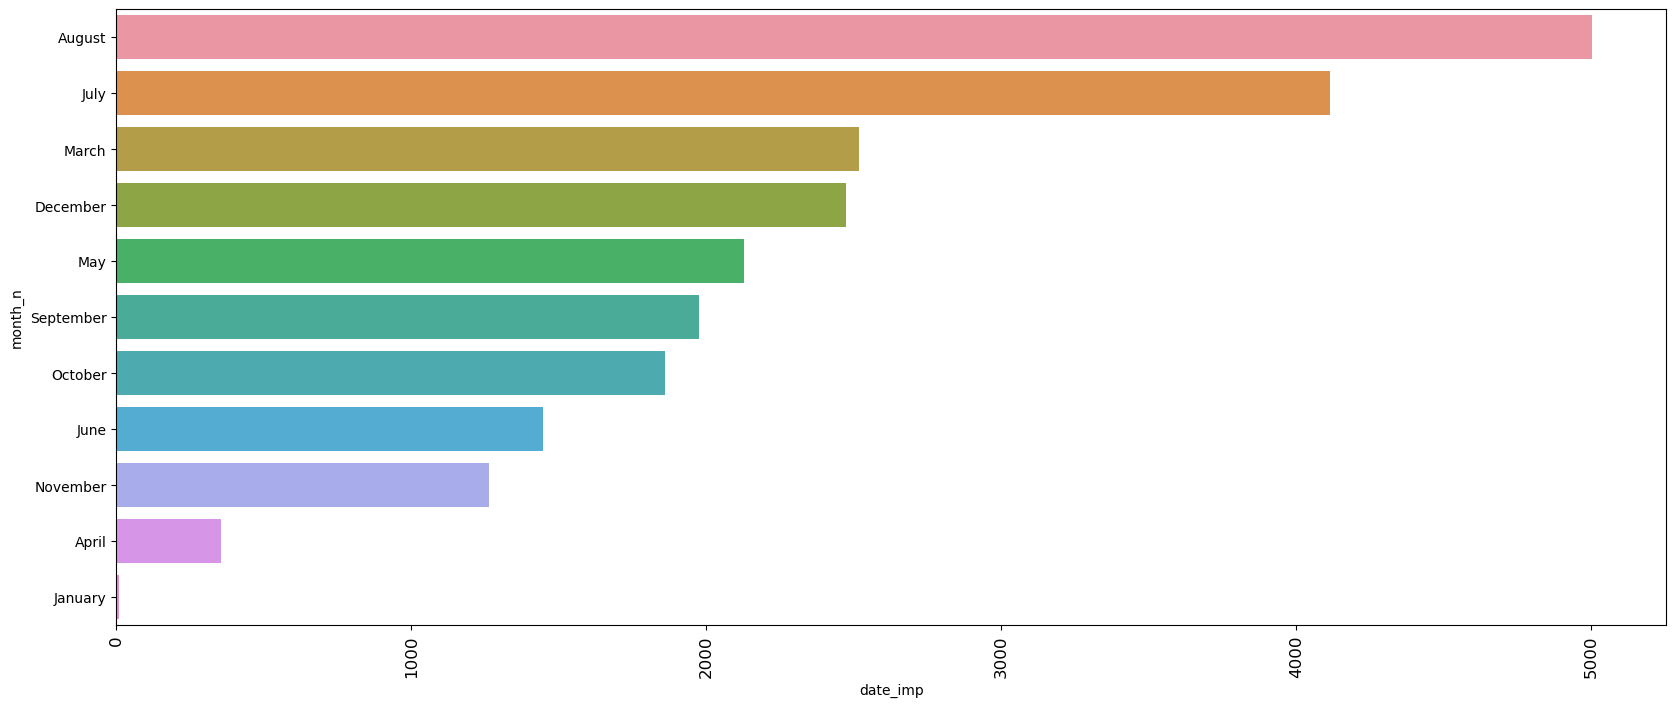

In [78]:
plt.figure(figsize=(20,8))
aux17 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(y='month_n', x='date_imp', data=aux17);

#### 2.5.1 Quais os meses que mais vendem por loja

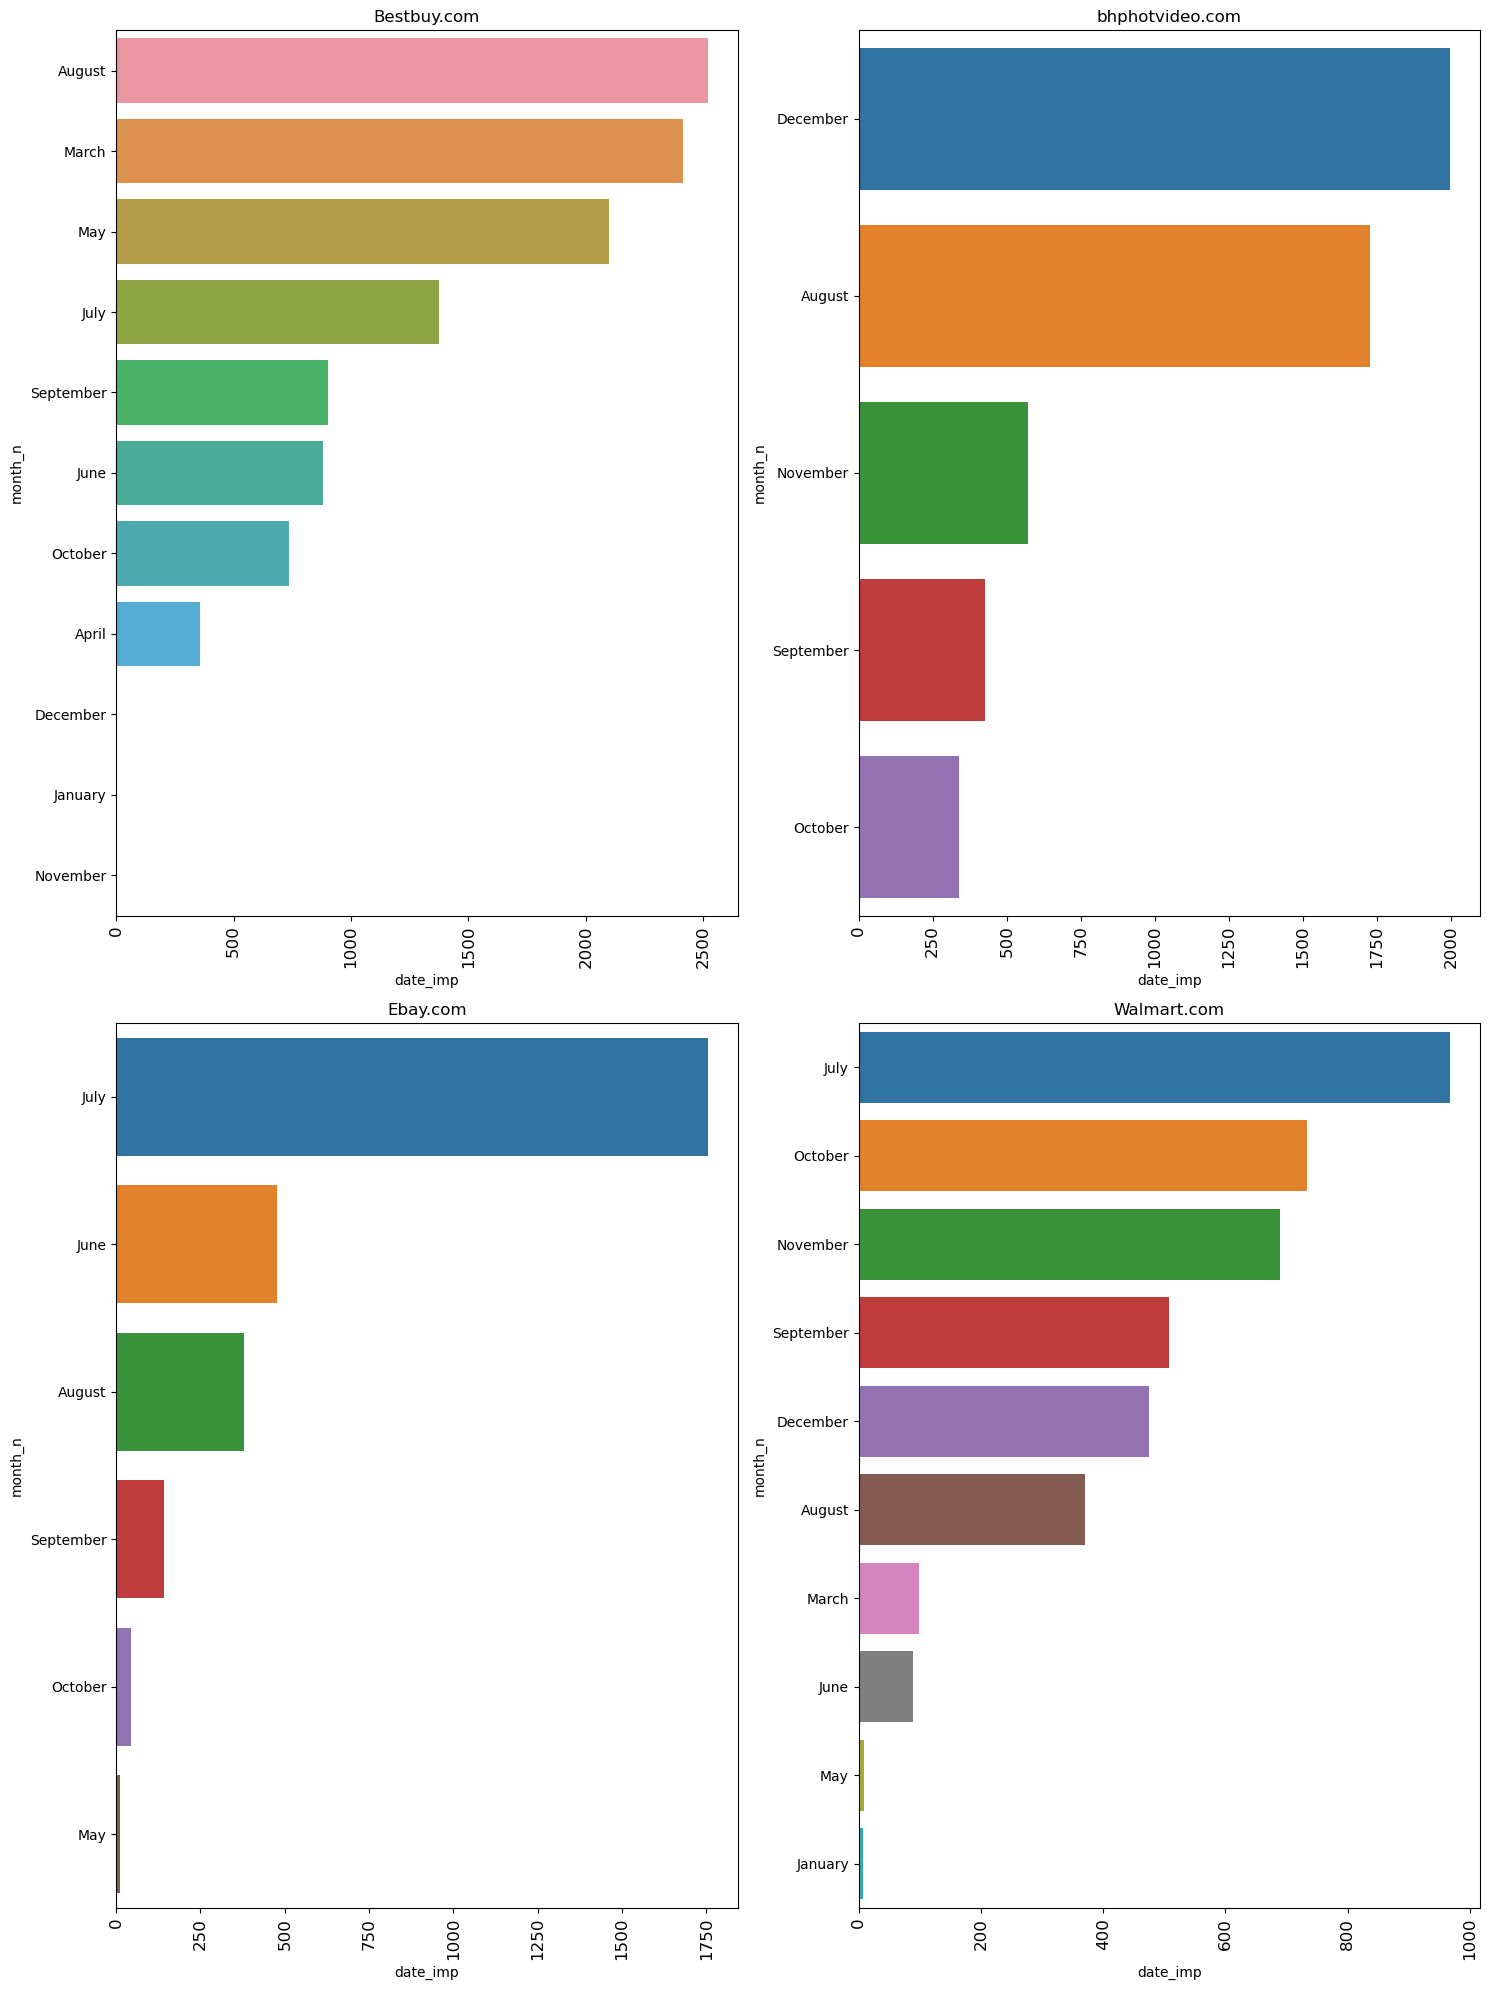

In [81]:
plt.figure(figsize=(15,20))


plt.subplot(2,2,1)
aux18 = df_best[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(y='month_n', x='date_imp', data=aux18)

plt.subplot(2,2,2)
aux19 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(y='month_n', x='date_imp', data=aux19)

plt.subplot(2,2,3)
aux20 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(y='month_n', x='date_imp', data=aux20)

plt.subplot(2,2,4)
aux21 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(y='month_n', x='date_imp', data=aux21)

plt.tight_layout()

As vendas da BestBuy estão concentradas no mês de Agosto (possivelmente ocorreu alguma promoção ou ofertas durante essa data ou algum fator externo). Essa força de vendas é tão forte que quando fizemos o gráfico das vendas no geral com todas as empresaas Agosto foi o mês que ocorreu mais vendas. 